# Aula 4 - Amostragem e Distribuição Normal e Z-score
* Amostragem
* Distribuição Normal e Z-score
* Teorema Central do Limite

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#Amostra aleatória simples
df_AAS = iris.sample(n=10)
df_AAS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 36 to 132
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  10 non-null     float64
 1   sepal_width   10 non-null     float64
 2   petal_length  10 non-null     float64
 3   petal_width   10 non-null     float64
 4   species       10 non-null     object 
dtypes: float64(4), object(1)
memory usage: 480.0+ bytes


In [5]:
#Amostra aleatória simples (com porcentagem)
#Padrão: sem reposição
df_AAS = iris.sample(frac=0.1)

In [6]:
df_AAS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 14 to 45
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  15 non-null     float64
 1   sepal_width   15 non-null     float64
 2   petal_length  15 non-null     float64
 3   petal_width   15 non-null     float64
 4   species       15 non-null     object 
dtypes: float64(4), object(1)
memory usage: 720.0+ bytes


In [7]:
#Amostragem aleatória estratificada
from sklearn.model_selection import train_test_split

iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
X_train,X_test,y_train,y_test = train_test_split(iris.drop('species',axis=1),
                                                           iris['species'],
                                                           stratify=iris['species'],
                                                           test_size=0.2)

In [10]:
y_test.shape

(30,)

In [11]:
y_test.value_counts()

versicolor    10
setosa        10
virginica     10
Name: species, dtype: int64

In [12]:
#Amostragem Aleatória Sistemática

#Definindo o tamanho da amostra
n_amostra = 10
#Calculando o step/razão (r)
r = 150/n_amostra

In [13]:
#Gera o primeiro elemento
semente = np.random.choice(16,1) #Gera um n° de 1 a r, no caso, 15
semente

array([7])

In [14]:
#Gerando os itens sorteados
indices =  np.arange(semente,151,r)

In [15]:
#Gerando a amostra a partir dos índices
amostra = iris.loc[indices,:]

In [16]:
amostra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 7 to 142
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  10 non-null     float64
 1   sepal_width   10 non-null     float64
 2   petal_length  10 non-null     float64
 3   petal_width   10 non-null     float64
 4   species       10 non-null     object 
dtypes: float64(4), object(1)
memory usage: 480.0+ bytes


In [17]:
amostra

,sepal_length,sepal_width,petal_length,petal_width,species
7,5.0,3.4,1.5,0.2,setosa
22,4.6,3.6,1.0,0.2,setosa
37,4.9,3.6,1.4,0.1,setosa
52,6.9,3.1,4.9,1.5,versicolor
67,5.8,2.7,4.1,1.0,versicolor
82,5.8,2.7,3.9,1.2,versicolor
97,6.2,2.9,4.3,1.3,versicolor
112,6.8,3.0,5.5,2.1,virginica
127,6.1,3.0,4.9,1.8,virginica
142,5.8,2.7,5.1,1.9,virginica


## Ilustração do Teorema Limite Central

In [18]:
mean = [0, 0, 0]

cov = [[2,1,0],[1,3,1],[0,1,4]]  

x1, x2, x3 = np.random.multivariate_normal(mean, cov, 10000).T

x4 = np.random.poisson(1, 10000)

dados = np.array([x1,x2,x3,x4])

df = pd.DataFrame(data=dados.T)

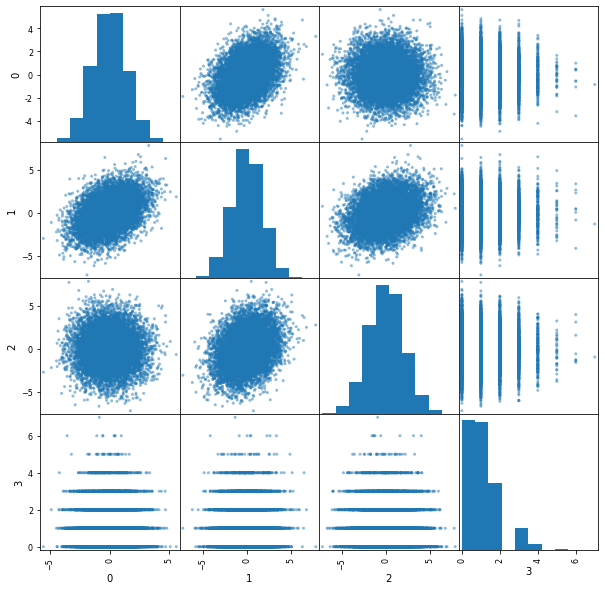

In [19]:
pd.plotting.scatter_matrix(df,figsize=(10,10))
plt.show()

In [22]:
from scipy.stats import norm

In [23]:
norm.cdf(-1)

0.15865525393145707

In [27]:
norm.cdf(20.2,20,1.4)

0.5040296514794429

In [ ]:
68.3/2

34.15

# Exercícios

In [28]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats

## Simulação de Monte Carlo 

Seja uma área inicialmente quadrada, com dimensão  $1$ m $\times$ $1$ m. Queremos estimar um parâmetro de uma função que determina a área dentro do setor circular mostrado abaixo.

Sabemos que:

Área = $\frac{\pi r^2}{4}$

Faça uma simulação de Monte-Carlo para estimar a proporção de pontos que residem dentro dessa área destacada.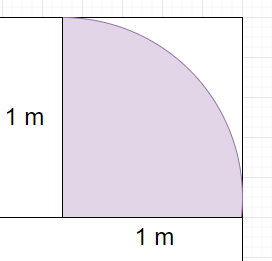

In [37]:
# Duas variáveis aleatórias com distribuição uniforme
x = np.random.random(1000000)
# Vamos pegar 100 amostras para x e 100 amostrar para y
y = np.random.random(1000000)
# Depois vamos saber se está dentro ou fora da área roxa
dist = np.sqrt(x**2 + y**2)

In [38]:
np.sum(dist <= 1) #quantos pontos estão dentro

785470

In [39]:
#quanto maior o número de pontos elegido no random acima, mais próximo de pi fica!
4 * np.sum(dist <= 1)/dist.shape[0] 

3.14188

In [42]:
#Rodar 100 vezes essa simulação e armazenar o resultado 
res_ = []
for i in range(100):
  #Duas variáveis aleatórias com distribuição uniforme
  x = np.random.random(100)
  #Vamos pegar 100 amostras para x e 100 amostras para y
  y = np.random.random(100)
  #Depois vamos saber se está dentro ou fora da área roxa.
  dist = np.sqrt(x**2 + y**2)
  resultado = 4*np.sum(dist <= 1)/dist.shape[0]
  res_.append(resultado)

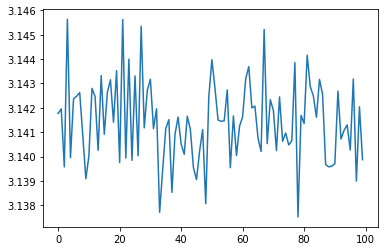

In [43]:
plt.plot(res_)
plt.grid()

In [44]:
res_np = np.array(res)
print(np.mean(res_np))

3.141447999999999


Escolha uma variável aleatória com distribuição normal e escolha um valor para a média. Em seguida, faça 100 simulações com 200 amostras cada e obtenha a estimativa da média. Faça o gráfico da estimativa média (i.e. média das simulações) em função das simulações.

Suponha que você trabalhe em um projeto de logística e está encarregado de organizar as caixas em uma região, conforme mostra a figura abaixo. 

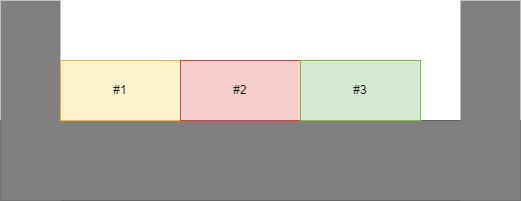

Suponha que o tamanho disponível é de 330 cm e sua dimensão possa variar uniformemente, com variação de +- 1 cm.

Suponha que as três caixas também possuem dimensões nominais, mas seu tamanho varia de acordo com uma distribuição que não é uniforme, nem normal.

$X_1$ ~ $Triang(72, 80, 88)$

$X_2$ ~ $Triang(118, 120, 130)$

$X_3$ ~ $Triang(116, 120, 122)$

Calcule a probabilidade de que as três caixas não caibam no lugar especificado.

In [ ]:
def montecarlo_triangle(l, m, r, n):
  vals = []
  for i in range(n):
    vals.append(np.random.triangular(l, m, r))
  return np.array(vals)

In [ ]:

  x1 = montecarlo_triangle(72, 80, 88, 100)
  x2 = montecarlo_triangle(118, 120, 130, 100)
  x3 = montecarlo_triangle(118, 120, 122, 100)
  tamanho_x = x1 + x2 + x3
  #Simlar o tamanho disponível 
  tamanho_final = 2*np.random.random(size=100) + 329 
  #Calcular "gap"

In [ ]:
gap = tamanho_final - tamanho_x
gap_dist = gap < 0
np.sum(gap_dist)/gap.shape[0]

0.0475